# 'Adventure' Playlist - Music Recommendations For Variety And The Long Tail

# Notebook 01 - Data Cleaning and EDA

&nbsp;

**By: [Jonathan Yeung](https://github.com/jonathan-yeung)**

In this notebook, I intend to clean the data and prepare dataframes for further use such as further EDA, clustering and recommendations later on. The dataframe *df_user_track* will be created by joining the two initial datasets "Music_Info" and "User_Listening_History", and will be used for futher EDA looking closer into the user engagement and track exposure in Notebook 02.

The variety of tracks in the dataset will also be assessed with EDA to see if they are good enough for making recommendations for variety.

---

# Table of Contents

1. [**Project Overview**](#Project-Overview)<br>

2. [**About the dataset**](#About-the-dataset)<br>
  2.1 [References](#references)<br>
  2.2 [Data Dictionary of the "Music_Info" dataset](#DataDictMusic)<br>
  2.3 [Data Dictionary of the "User_Listening_History" dataset](#DataDictUser)<br>

3. [**Imports**](#Imports)<br>

4. [**Helper function**](#Helper-function)<br>

5. [**Data Preparation**](#Data-Preparation)<br>

6. [**Track data**](#Track-data)<br>
  6.1 [Observations on the "Music_Info" dataset](#ObsMusic)<br>
  6.2 [About `genre` and `tags`](#genre-tags)<br>
  6.3 [df_track_cleaned](#df_track_cleaned)<br>

7. [**Exploratory Data Analysis - Numerical Variables**](#EDA_Num)<br>
  7.1 [Univariate Analysis](#Uni_Num)<br>
  7.2 [Bivariate Analysis](#Bi_Num)<br>

8. [**Exploratory Data Analysis - Categorical Variables**](#EDA_Cat)<br>
  8.1 [Univariate Analysis](#Uni_Cat)<br>

9. [**User data**](#User-data)<br>
  9.1 [Observations on the "User_Listening_History" dataset](#ObsUser)<br>

10. [**df_user_track**](#df_user_track)<br>
  10.1 [Observations on the User-track dataset](#ObsUserTrack)<br>

11. [**Notebook Summary**](#Notebook-Summary)<br>

---

# Project Overview

## Problem Statement

**User side - "echo chamber"**

When music listeners use music streaming platforms, they might have experience of being in an **"echo chamber"**. The recommender algorithm might point back to the users' past listening experience and recommends songs that are very similar. This could give a feeling to users that they are "trapped" in a musical cohort. Some users might also be interested in music in the niche sectors or new sound for inspirations, but find it difficult to discover those contents as searching by keywords on song title, album name, artist name or even genre is often ineffective in this situation. They might not even have heard of any information about the artist or the song, let alone searching and discovering by keywords. A recommender algorithm that could pick up audio features and make recommendations for them would be very helpful then, and could potentially increase the user engagement on the streaming platforms.

**Artist side - "cold-start" problem for the long tail**

The market of artists (meaning musicians, used interchangeably) is a long-tail one in terms of popularity or the number of followers, which means there is actually a large amount of artists if you cut out the long tail. Inside the long tail, you could easily find that there are a lot of independent artists, niche artists and new comers. They might often encounter the cold-start problem, which means that their tracks might be at a disadvantaged position in the recommender system. A recommender algorithm that could **pick up audio features but not certain kinds of track record** and make recommendations could be more beneficial to the artists.

## Proposed Solution (Prototype)

### "Adventure" Playlist - finding "relevant but novel" sound for users

This project is to explore and create a new playlist recommendation to discover music with variety for users and match the music of musicians in the long-tail market to potential fans using content-based recommendations with **"novelty-relevance" approach**. I intend to define a new metric of "novelty-relevance score" and explore this new way of recommendation.

**This approach aims to find relevant but novel sounding tracks for users, and it uses only audio features and tags so that artists in the long-tail market could also be benefitted.**

The playlist is called an "Adventure" playlist, and it contains a **customizable function for users to control the weighting of novelty** (against relevance) in the playlist when they want to adventure through the music in the database. The customization could be displayed as a slidebar in an actual app, and the users could control the playlist using the slidebar and see the playlist updating real-time.

---

# About the dataset

This is a rebuilt version and subset of The Million Song Dataset¹. It was built up with lastfm-spotify-tags-sim-userdata² (The Echo Nest Taste Profile Subset³ & lastfm-dataset-2020⁴), tagtraum genre annotations⁵, and Spotify API⁶.

It is extracted from https://www.kaggle.com/datasets/undefinenull/million-song-dataset-spotify-lastfm, where the two subsets of data "Music Info" and "User Listening History" are utilized here.

The "Music_Info" dataset contains three main types of data: high level meta-data of songs such as the artist, title and publishing year of a song, various audio features of songs, and tags and genres that are associated with the songs. The "User_Listening_History" dataset contains the playcounts on tracks that the users listened to.


## References: <a name="references"></a>
1. The Million Song Dataset: http://millionsongdataset.com/
2. lastfm-spotify-tags-sim-userdata: https://github.com/slettner/lastfm-spotify-tags-sim-userdata
3. The Echo Nest Taste Profile Subset: http://millionsongdataset.com/tasteprofile/
4. lastfm-dataset-2020: https://github.com/renesemela/lastfm-dataset-2020
5. tagtraum genre annotations: https://www.tagtraum.com/msd_genre_datasets.html
6. Spotify API: https://developer.spotify.com/documentation/web-api

## Data Dictionary of the "Music_Info" dataset: <a name="DataDictMusic"></a>

**Basic info of tracks:**

| Column Name | Data Type | Description |
|:--|:--|:--|
| `track_id` | string | Unique track ID from Million Song Dataset |
| `name` | string | Name of the track |
| `artist` | string | Name of the artist |
| `spotify_preview_url` | string | A link to a 30 second preview (MP3 format) of the track. Can be null |
| `spotify_id` | string | Spotify ID of the track |
| `year` | int | The year the album was first released. |
| `duration_ms` | int | Track length in milliseconds |

&nbsp;

**Audio features of tracks:**

| Column Name | Data Type | Description |
|:--|:--|:--|
| `tags` | string | Genre descriptors from last.fm |
| `genre` | string | Genre of the track |
| `danceability` | float | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| `energy` | float | A perceptual measure of intensity and activity, measured from 0.0 to 1.0. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| `key` | integer | The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
| `loudness` | float | The overall loudness of a track in decibels (dB), averaged across the track. Values typically range between -60 and 0 db. |
| `mode` | integer | The modality (major or minor) of a track. Major is represented by 1 and minor is 0. |
| `speechiness` | float | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| `acousticness` | float | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| `instrumentalness` | float | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| `liveness` | float | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| `valence` | float | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| `tempo` | float | The overall estimated tempo of a track in beats per minute (BPM) |
| `time_signature` | integer | Number of beats for each bar, ranging from 3 to 7 |

## Data Dictionary of the "User_Listening_History" dataset: <a name="DataDictUser"></a>


| Column Name | Data Type | Description |
|:--|:--|:--|
| `track_id` | string | Track ID |
| `user_id` | string | User unique ID |
| `playcount` | integer | Number of times the user played the track |


**Appendix for dataframes**

An overview of the main dataframes used throughout the project is shown in Notebook 06 for reference.

---

# Imports

In [1]:
# misc
import os

# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Helper function

**Sanity Check Function**

In [2]:
def sanity_check(df):

    # Make sure the input is a dataframe
    assert isinstance(df, pd.core.frame.DataFrame), "Input must be a dataframe"

    # Quick view of the head of the dataset
    print(" Head of the dataset ".center(100,'='))
    print()
    display(df.head().T)

    # Basic info of the dataset
    print("\n \n")
    print(" Basic info of the dataset ".center(100,'='))
    print()
    print(f'Our dataset has {df.shape[0]} rows and {df.shape[1]} columns. \n')
    df.info()
    print("\n \n**Basic descriptive statistics of the dataset**")
    display(df.describe().T)

    # Checking for data types
    print("\n \n")
    print(" Data Types ".center(100,'='))
    print()
    num_cols = df.select_dtypes(include = 'number').columns
    non_num_cols = df.select_dtypes(exclude = 'number').columns
    cat_cols = df.select_dtypes(include = 'object').columns
    datetime_cols = df.select_dtypes(include = 'datetime').columns
    display(pd.DataFrame({'Numerical': list(num_cols)}))
    display(pd.DataFrame({'Non-numerical': list(non_num_cols)}))
    display(pd.DataFrame({'Categorical': list(cat_cols)}))
    display(pd.DataFrame({'Date-time': list(datetime_cols)}))

    # Checking for missing values
    print("\n \n")
    print(" Missing Values ".center(100,'='))
    print()
    print(f"There are {df.isna().sum().sum()} missing values in total, which comprise {round(df.isna().sum().sum()/(df.size)*100.0, 2)}% of the dataset.")
    print()
    print("Missing Values per column:")
    display(pd.DataFrame({'Missing Values': df.isna().sum(),\
                          '% of the column': round(df.isna().sum()/df.shape[0]*100.0, 2),\
                          'Data Types': df.dtypes}))

    # Checking for duplicated values
    print("\n \n")
    print(" Duplicates ".center(100,'='))
    print()
    print(f"There are {df.duplicated().sum()} Duplicated Rows, which comprise {round(df.duplicated().sum()/df.shape[0]*100.0, 2)}% of the dataset. ")
    print()
    print("Duplicated Values per column:")
    display(pd.DataFrame({'Number of Duplicated Values': df.shape[0]-df.nunique(),\
                          '% of the column': round((df.shape[0]-df.nunique())/df.shape[0]*100.0, 2),\
                          'Data Types': df.dtypes}))

    # Number of unique values per column
    print("\n \n")
    print(" Unique Values ".center(100,'='))
    print()
    print("Number of Unique Values per column:")
    display(pd.DataFrame({'Number of Unique Values': df.nunique(), 'Data Types': df.dtypes}))

# Data Preparation

In [ ]:
file_path = ''

In [ ]:
check_file_music = os.path.isfile(file_path + 'data/Music_Info.csv')
check_file_user = os.path.isfile(file_path + 'data/User_Listening_History.csv')

print(check_file_music)
print(check_file_user)

In [52]:
df_music = pd.read_csv(file_path + 'data/Music_Info.csv')
df_user = pd.read_csv(file_path + 'data/User_Listening_History.csv')

---

# Track data

In [6]:
sanity_check(df_music)

======================================= Head of the dataset ========================================



,0,1,2,3,4
track_id,TRIOREW128F424EAF0,TRRIVDJ128F429B0E8,TROUVHL128F426C441,TRUEIND128F93038C4,TRLNZBD128F935E4D8
name,Mr. Brightside,Wonderwall,Come as You Are,Take Me Out,Creep
artist,The Killers,Oasis,Nirvana,Franz Ferdinand,Radiohead
spotify_preview_url,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,https://p.scdn.co/mp3-preview/d012e536916c927b...,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,https://p.scdn.co/mp3-preview/399c401370438be4...,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...
spotify_id,09ZQ5TmUG8TSL56n0knqrj,06UfBBDISthj1ZJAtX4xjj,0keNu0t0tqsWtExGM3nT1D,0ancVQ9wEcHVd0RrGICTE4,01QoK9DA7VTeTSE3MNzp4I
tags,"rock, alternative, indie, alternative_rock, in...","rock, alternative, indie, pop, alternative_roc...","rock, alternative, alternative_rock, 90s, grunge","rock, alternative, indie, alternative_rock, in...","rock, alternative, indie, alternative_rock, in..."
genre,NaN,NaN,RnB,NaN,RnB
year,2004,2006,1991,2004,2008
duration_ms,222200,258613,218920,237026,238640
danceability,0.355,0.409,0.508,0.279,0.515



 

==================================== Basic info of the dataset =====================================

Our dataset has 50683 rows and 21 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null

,count,mean,std,min,25%,50%,75%,max
year,50683.0,2004.017323,8.860172,1900.0,2001.000000,2006.00000,2009.0000,2022.000
duration_ms,50683.0,251155.105972,107585.956031,1439.0,192733.000000,234933.00000,288193.0000,3816373.000
danceability,50683.0,0.493537,0.178838,0.0,0.364000,0.49700,0.6210,0.986
energy,50683.0,0.686486,0.251808,0.0,0.514000,0.74400,0.9050,1.000
key,50683.0,5.312748,3.568078,0.0,2.000000,5.00000,9.0000,11.000
loudness,50683.0,-8.291204,4.548365,-60.0,-10.375000,-7.20000,-5.0890,3.642
mode,50683.0,0.631060,0.482522,0.0,0.000000,1.00000,1.0000,1.000
speechiness,50683.0,0.076023,0.076007,0.0,0.035200,0.04820,0.0835,0.954
acousticness,50683.0,0.213808,0.302848,0.0,0.001400,0.03990,0.3400,0.996
instrumentalness,50683.0,0.225283,0.337049,0.0,0.000018,0.00563,0.4410,0.999



 

============================================ Data Types ============================================



,Numerical
0,year
1,duration_ms
2,danceability
3,energy
4,key
5,loudness
6,mode
7,speechiness
8,acousticness
9,instrumentalness


,Non-numerical
0,track_id
1,name
2,artist
3,spotify_preview_url
4,spotify_id
5,tags
6,genre


,Categorical
0,track_id
1,name
2,artist
3,spotify_preview_url
4,spotify_id
5,tags
6,genre


,Date-time



 

========================================== Missing Values ==========================================

There are 29462 missing values in total, which comprise 2.77% of the dataset.

Missing Values per column:


,Missing Values,% of the column,Data Types
track_id,0,0.00,object
name,0,0.00,object
artist,0,0.00,object
spotify_preview_url,0,0.00,object
spotify_id,0,0.00,object
tags,1127,2.22,object
genre,28335,55.91,object
year,0,0.00,int64
duration_ms,0,0.00,int64
danceability,0,0.00,float64



 

============================================ Duplicates ============================================

There are 0 Duplicated Rows, which comprise 0.0% of the dataset. 

Duplicated Values per column:


,Number of Duplicated Values,% of the column,Data Types
track_id,0,0.00,object
name,0,0.00,object
artist,42366,83.59,object
spotify_preview_url,63,0.12,object
spotify_id,9,0.02,object
tags,30626,60.43,object
genre,50668,99.97,object
year,50608,99.85,int64
duration_ms,26481,52.25,int64
danceability,49597,97.86,float64



 

========================================== Unique Values ===========================================

Number of Unique Values per column:


,Number of Unique Values,Data Types
track_id,50683,object
name,50683,object
artist,8317,object
spotify_preview_url,50620,object
spotify_id,50674,object
tags,20057,object
genre,15,object
year,75,int64
duration_ms,24202,int64
danceability,1086,float64


In [7]:
# checking the spotify_id
print(f"There are {df_music['spotify_id'].nunique()} unique values of spotify_id and {df_music.shape[0]-df_music['spotify_id'].nunique()} duplicated spotify_id")

There are 50674 unique values of spotify_id and 9 duplicated spotify_id


In [8]:
# checking the track_id
print(f"There are {df_music['track_id'].nunique()} unique values of track_id and {df_music.shape[0]-df_music['track_id'].nunique()} duplicated track_id")

There are 50683 unique values of track_id and 0 duplicated track_id


## Observations on the "Music_Info" dataset: <a name="ObsMusic"></a>

- The "Music_Info" dataset has 50,683 rows and 21 columns.
- 50,683 unique tracks (by `track_id`) in the dataset
- The release `year` of the tracks in the dataset range from 1900 to 2022.

**Data types**
- strings columns - `track_id`, `name`, `artist`, `spotify_preview_url`, `spotify_id`, `tags`, `genre`
- numerical columns - `year`, `duration_ms`, `danceability`, `energy`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`
- `key`, `mode` and `time_signature` should be treated as nominal categorical variables despite stored as integers

**Null values**

Only the `tags` and `genre` columns have missing values

- `tags`: 1,127 missing values out of 50,683 rows, comprising 2.22% of the column
- `genre`: 28,335 missing values out of 50,683 rows, comprising 55.91% of the column

**Duplicates**
- no exact duplicates for rows
- 9 duplicated `spotify_id` out of 50,683 rows
- no duplicated `track_id`, which means `track_id` values are unique here and can be used as a primary key to join the "User_Listening_History" dataset

## About `genre` and `tags` <a name="genre-tags"></a>

55.91% of the `genre` column are null values, while the remaining parts only have 15 unique values for genres. The 15 genres probably cannot label all the tracks well; some tracks would either not fit into any of the 15 genres, or be mislabelled. The genre label itself is of a very broad coverage in terms of definition. It loses a lot of granularity of the cohort(s) a track belongs to.

On the other hand, the `tags` column have a much smaller portion of missing values (2.22% of the column), while for every cell, there can be multiple tags for one track. This provides more granularity for the musical features of tracks, and would give a closer approximation of which cohort(s) a track ought to belong to.

For this dataset, utilizing the `tags` column would be more preferrable.

More discussions can be found from:
- https://speakerdeck.com/hendriks73/improving-genre-annotations-for-the-million-song-dataset
- https://www.tagtraum.com/download/schreiber_msdgenre_ismir2015.pdf

In [9]:
df_music['genre'].nunique()

15

In [10]:
df_music['genre'].value_counts()

genre
Rock          9965
Electronic    3710
Metal         2516
Pop           1145
Rap            821
Jazz           793
RnB            696
Reggae         691
Country        607
Punk           383
Folk           355
New Age        237
Blues          189
World          140
Latin          100
Name: count, dtype: int64

There appear to be 9 pairs of the same songs, having the same names and same artist names in their own pairs. We drop the tracks that have less information in their own pairs.

In [11]:
df_music[df_music['spotify_id'].duplicated(keep=False)].sort_values(by='artist')

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
14861,TRLOZQZ128F92E8A3F,How Do You Want It,2Pac,https://p.scdn.co/mp3-preview/59f243514e63d634...,02VsIBmSkhc7uHNyPViZR3,"rap, hip_hop",NaN,2011,289000,0.832,...,8,-2.859,1,0.0930,0.11100,0.000007,0.0623,0.8120,92.468,4
14981,TRXHJQY128F42B5094,How Do U Want It,2Pac,https://p.scdn.co/mp3-preview/59f243514e63d634...,02VsIBmSkhc7uHNyPViZR3,"rap, hip_hop, american",Rap,2011,289000,0.832,...,8,-2.859,1,0.0930,0.11100,0.000007,0.0623,0.8120,92.468,4
49162,TRZBNQU128F148C04F,Je Pense A Toi,Amadou & Mariam,https://p.scdn.co/mp3-preview/adcdf1077f16f2c7...,09jsAIZF9ThihIzdrw4KAS,NaN,NaN,2005,316880,0.680,...,11,-11.585,0,0.0279,0.74900,0.001610,0.1580,0.8280,106.349,4
37040,TRGCZFO128F92EE221,Je pense à toi,Amadou & Mariam,https://p.scdn.co/mp3-preview/adcdf1077f16f2c7...,09jsAIZF9ThihIzdrw4KAS,"alternative, beautiful, french",NaN,2005,316880,0.680,...,11,-11.585,0,0.0279,0.74900,0.001610,0.1580,0.8280,106.349,4
32191,TRCEFVZ128F4283203,The Greatest Hit,Annie,https://p.scdn.co/mp3-preview/82e186b1ddf2b2a5...,3MUviQJP5DSYI3Li4EbYTQ,"electronic, pop, female_vocalists, dance, electro",NaN,2004,220293,0.786,...,10,-3.249,0,0.1380,0.00261,0.000171,0.1550,0.5470,127.128,4
29710,TRRLAHF12903CAFEA1,Greatest Hit,Annie,https://p.scdn.co/mp3-preview/82e186b1ddf2b2a5...,3MUviQJP5DSYI3Li4EbYTQ,"electronic, pop, dance, house",NaN,2004,220293,0.786,...,10,-3.249,0,0.1380,0.00261,0.000171,0.1550,0.5470,127.128,4
26389,TRCUHWL128F4249F1A,Hallmark,Broken Social Scene,https://p.scdn.co/mp3-preview/68604cdb33249a23...,1Ntzk4JoxcAsrWi73MoBjr,"indie, alternative_rock, instrumental, post_rock",NaN,2004,233706,0.523,...,0,-10.694,1,0.0434,0.08790,0.109000,0.1440,0.1720,119.980,3
23200,TRXUYQW128F42370DB,hHallmark,Broken Social Scene,https://p.scdn.co/mp3-preview/68604cdb33249a23...,1Ntzk4JoxcAsrWi73MoBjr,"alternative, indie, ambient, soundtrack, psych...",Rock,2004,233706,0.523,...,0,-10.694,1,0.0434,0.08790,0.109000,0.1440,0.1720,119.980,3
6588,TRGGALK12903CB68E5,3 AM,Matchbox Twenty,https://p.scdn.co/mp3-preview/cb68c9ae8925bb3f...,5vYA1mW9g2Coh1HUFUSmlb,"rock, alternative, pop, alternative_rock, 90s,...",NaN,1996,225946,0.521,...,8,-8.685,1,0.0284,0.00573,0.000000,0.1200,0.5430,108.031,4
29795,TRLOXMF128F934BF04,3AM,Matchbox Twenty,https://p.scdn.co/mp3-preview/cb68c9ae8925bb3f...,5vYA1mW9g2Coh1HUFUSmlb,"rock, alternative, 90s, piano, american, pop_rock",NaN,1996,225946,0.521,...,8,-8.685,1,0.0284,0.00573,0.000000,0.1200,0.5430,108.031,4


In [119]:
df_track_cleaned = df_music.drop([14861, 49162, 29710, 26389, 6588, 2983, 21570, 42187, 46512]).copy()

In [120]:
# no duplicated spotify_id in the dataframe now
df_track_cleaned.duplicated('spotify_id').sum()

0

Also, we have to drop the `genre` column and remove the rows with missing values in `tags` column.

In [121]:
df_track_cleaned.drop(columns=['genre'], inplace=True)

In [122]:
df_track_cleaned.dropna(inplace=True)

In [123]:
# no missing values in the cleaned dataframe now
df_track_cleaned.isna().sum()

track_id               0
name                   0
artist                 0
spotify_preview_url    0
spotify_id             0
tags                   0
year                   0
duration_ms            0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
dtype: int64

In [44]:
# df_track_cleaned.to_csv(file_path + 'data/df_track_cleaned.csv', index=False)

## df_track_cleaned

This is the cleaned dataset for tracks in the database, which is ready for use for further analysis.

In [32]:
# check_file_track_cleaned = os.path.isfile(file_path + 'data/df_track_cleaned.csv')

# print(check_file_track_cleaned)

True


In [53]:
# # uncomment this cell and run df_track_cleaned from here
# df_track_cleaned = pd.read_csv(file_path + 'data/df_track_cleaned.csv')
# df_track_cleaned.head(2).T

,0,1
track_id,TRIOREW128F424EAF0,TRRIVDJ128F429B0E8
name,Mr. Brightside,Wonderwall
artist,The Killers,Oasis
spotify_preview_url,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,https://p.scdn.co/mp3-preview/d012e536916c927b...
spotify_id,09ZQ5TmUG8TSL56n0knqrj,06UfBBDISthj1ZJAtX4xjj
tags,"rock, alternative, indie, alternative_rock, in...","rock, alternative, indie, pop, alternative_roc..."
year,2004,2006
duration_ms,222200,258613
danceability,0.355,0.409
energy,0.918,0.892


In [15]:
df_track_cleaned.shape

(49548, 20)

In [16]:
df_track_cleaned['track_id'].nunique()

49548

There are 49,548 tracks remaining in df_track_cleaned

---

# Exploratory Data Analysis - Numerical Variables <a name="EDA_Num"></a>

## Univariate Analysis <a name="Uni_Num"></a>

In [17]:
# converting the unit of duration of tracks from milliseconds to minutes, for easier understanding from the visualization
df_duration = df_track_cleaned[['track_id', 'duration_ms']].copy()
df_duration['duration_min'] = df_duration['duration_ms']/(1000*60)

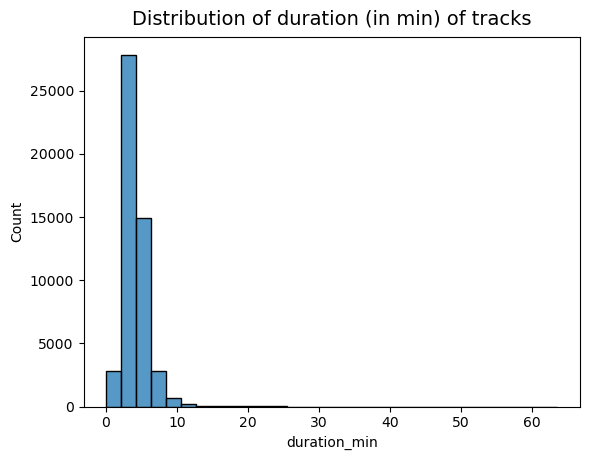

In [18]:
plt.figure()
sns.histplot(df_duration['duration_min'], bins=30)
plt.title("Distribution of duration (in min) of tracks", fontsize=14, y=1.01)
plt.show()

<Figure size 640x480 with 0 Axes>

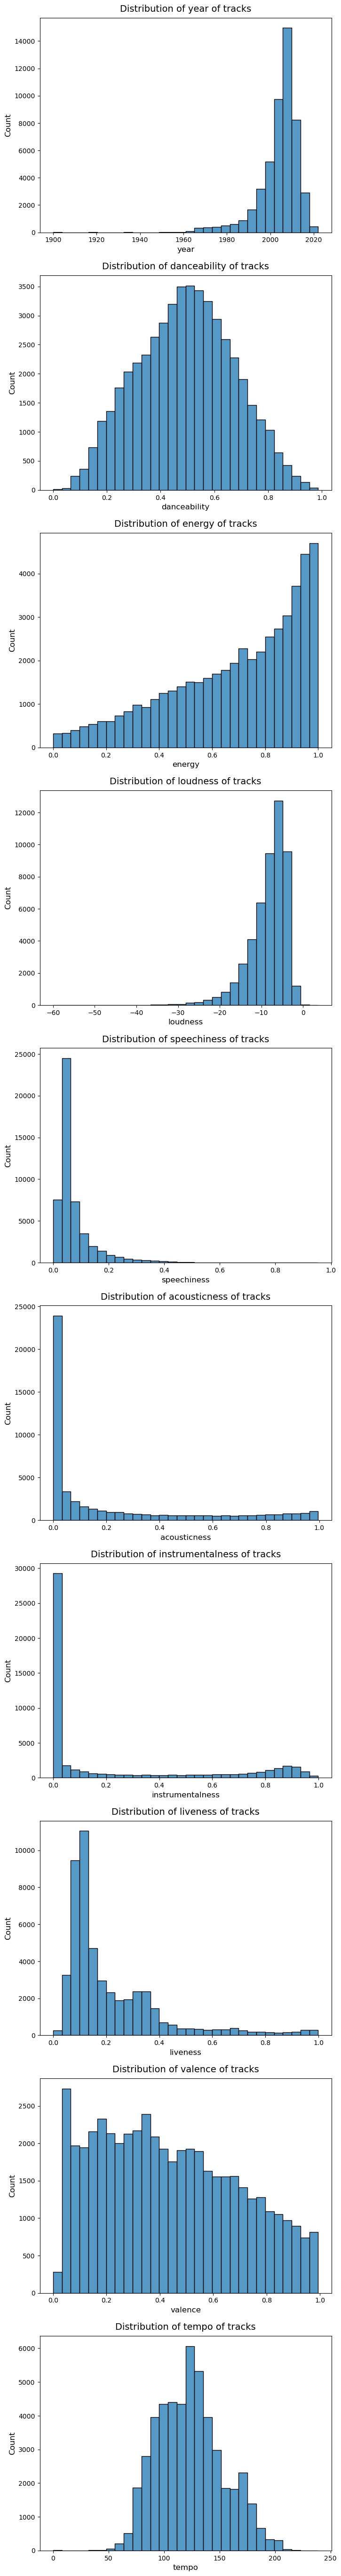

In [20]:
num_cols = ['year', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure()
plt.subplots(10, 1, figsize=(8, 70))
i = 1
for num_col in num_cols:
    plt.subplot(10, 1, i)
    sns.histplot(df_track_cleaned[num_col], bins=30)
    plt.title(f"Distribution of {num_col} of tracks", fontsize=14, y=1.01)
    plt.xlabel(num_col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    i += 1
plt.show()

In [21]:
# median of danceability
np.percentile(df_track_cleaned['danceability'], 50)

0.497

In [22]:
# 5th percentile of danceability
np.percentile(df_track_cleaned['danceability'], 5)

0.196

In [23]:
# 95th percentile of danceability
np.percentile(df_track_cleaned['danceability'], 95)

0.79

Release year of tracks (`year`):

- The majority of the release years of the tracks in the dataset are from 1990s to 2010s, despite the range for the entire dataset is from 1900 to 2022.

Duration of tracks (`duration_ms` or `duration_min`):

- Most tracks are under 6 minutes long.

`tempo` (in bpm - beats per minute):

- Tempo of the tracks are roughly bell-shaped
- Most tracks have a tempo between 60 bpm and 180 bpm which are expected, as 60 bpm means very slow and 180 bpm means very fast generally.

`loudness` (in decibels):

- Loudness ranges from -60 to 3.642.

For the variables `danceability`, `energy`, `speechiness`, `acousticness`, `instrumentalness`, `liveness` and `valence`, the values are all between 0.0 and 1.0

`speechiness`:

- In the dataset, the majority of the tracks have speechiness value under 0.33, which means that most of the tracks are music or non-speech-like music.
- Very few of them would be rap music or music mixed with speech (speechiness between 0.33 and 0.66).
- Even less number of them would be speech-like recording such as audio book or podcast (speechiness above 0.66).

`danceability`:

- Danceability of the tracks are roughly bell-shaped centered at around 0.5 with roughly 5% below 0.2 and 5% above 0.8.
- From the graph, the database offers tracks with a good variety of danceability. 

`energy`:

- A bigger proportion of tracks in the dataset have energy on the high-value side, which means they are more intense and active perceptually.

`acousticness`, `instrumentalness`, and `liveness`:

- All of them are heavily concentrated near 0.0.
- Most tracks made were not acoustic
- Tracks are still mainly songs that involve human voice such as singing or rapping, while there is a small bulge on the instrumental side.
- Tracks are mainly recorded version. The proportion of live recordings in the dataset is much lower.

`valence`:

- The distribution of valence of tracks is skewed to the right, which means that more tracks sound negative.

## Bivariate Analysis <a name="Bi_Num"></a>

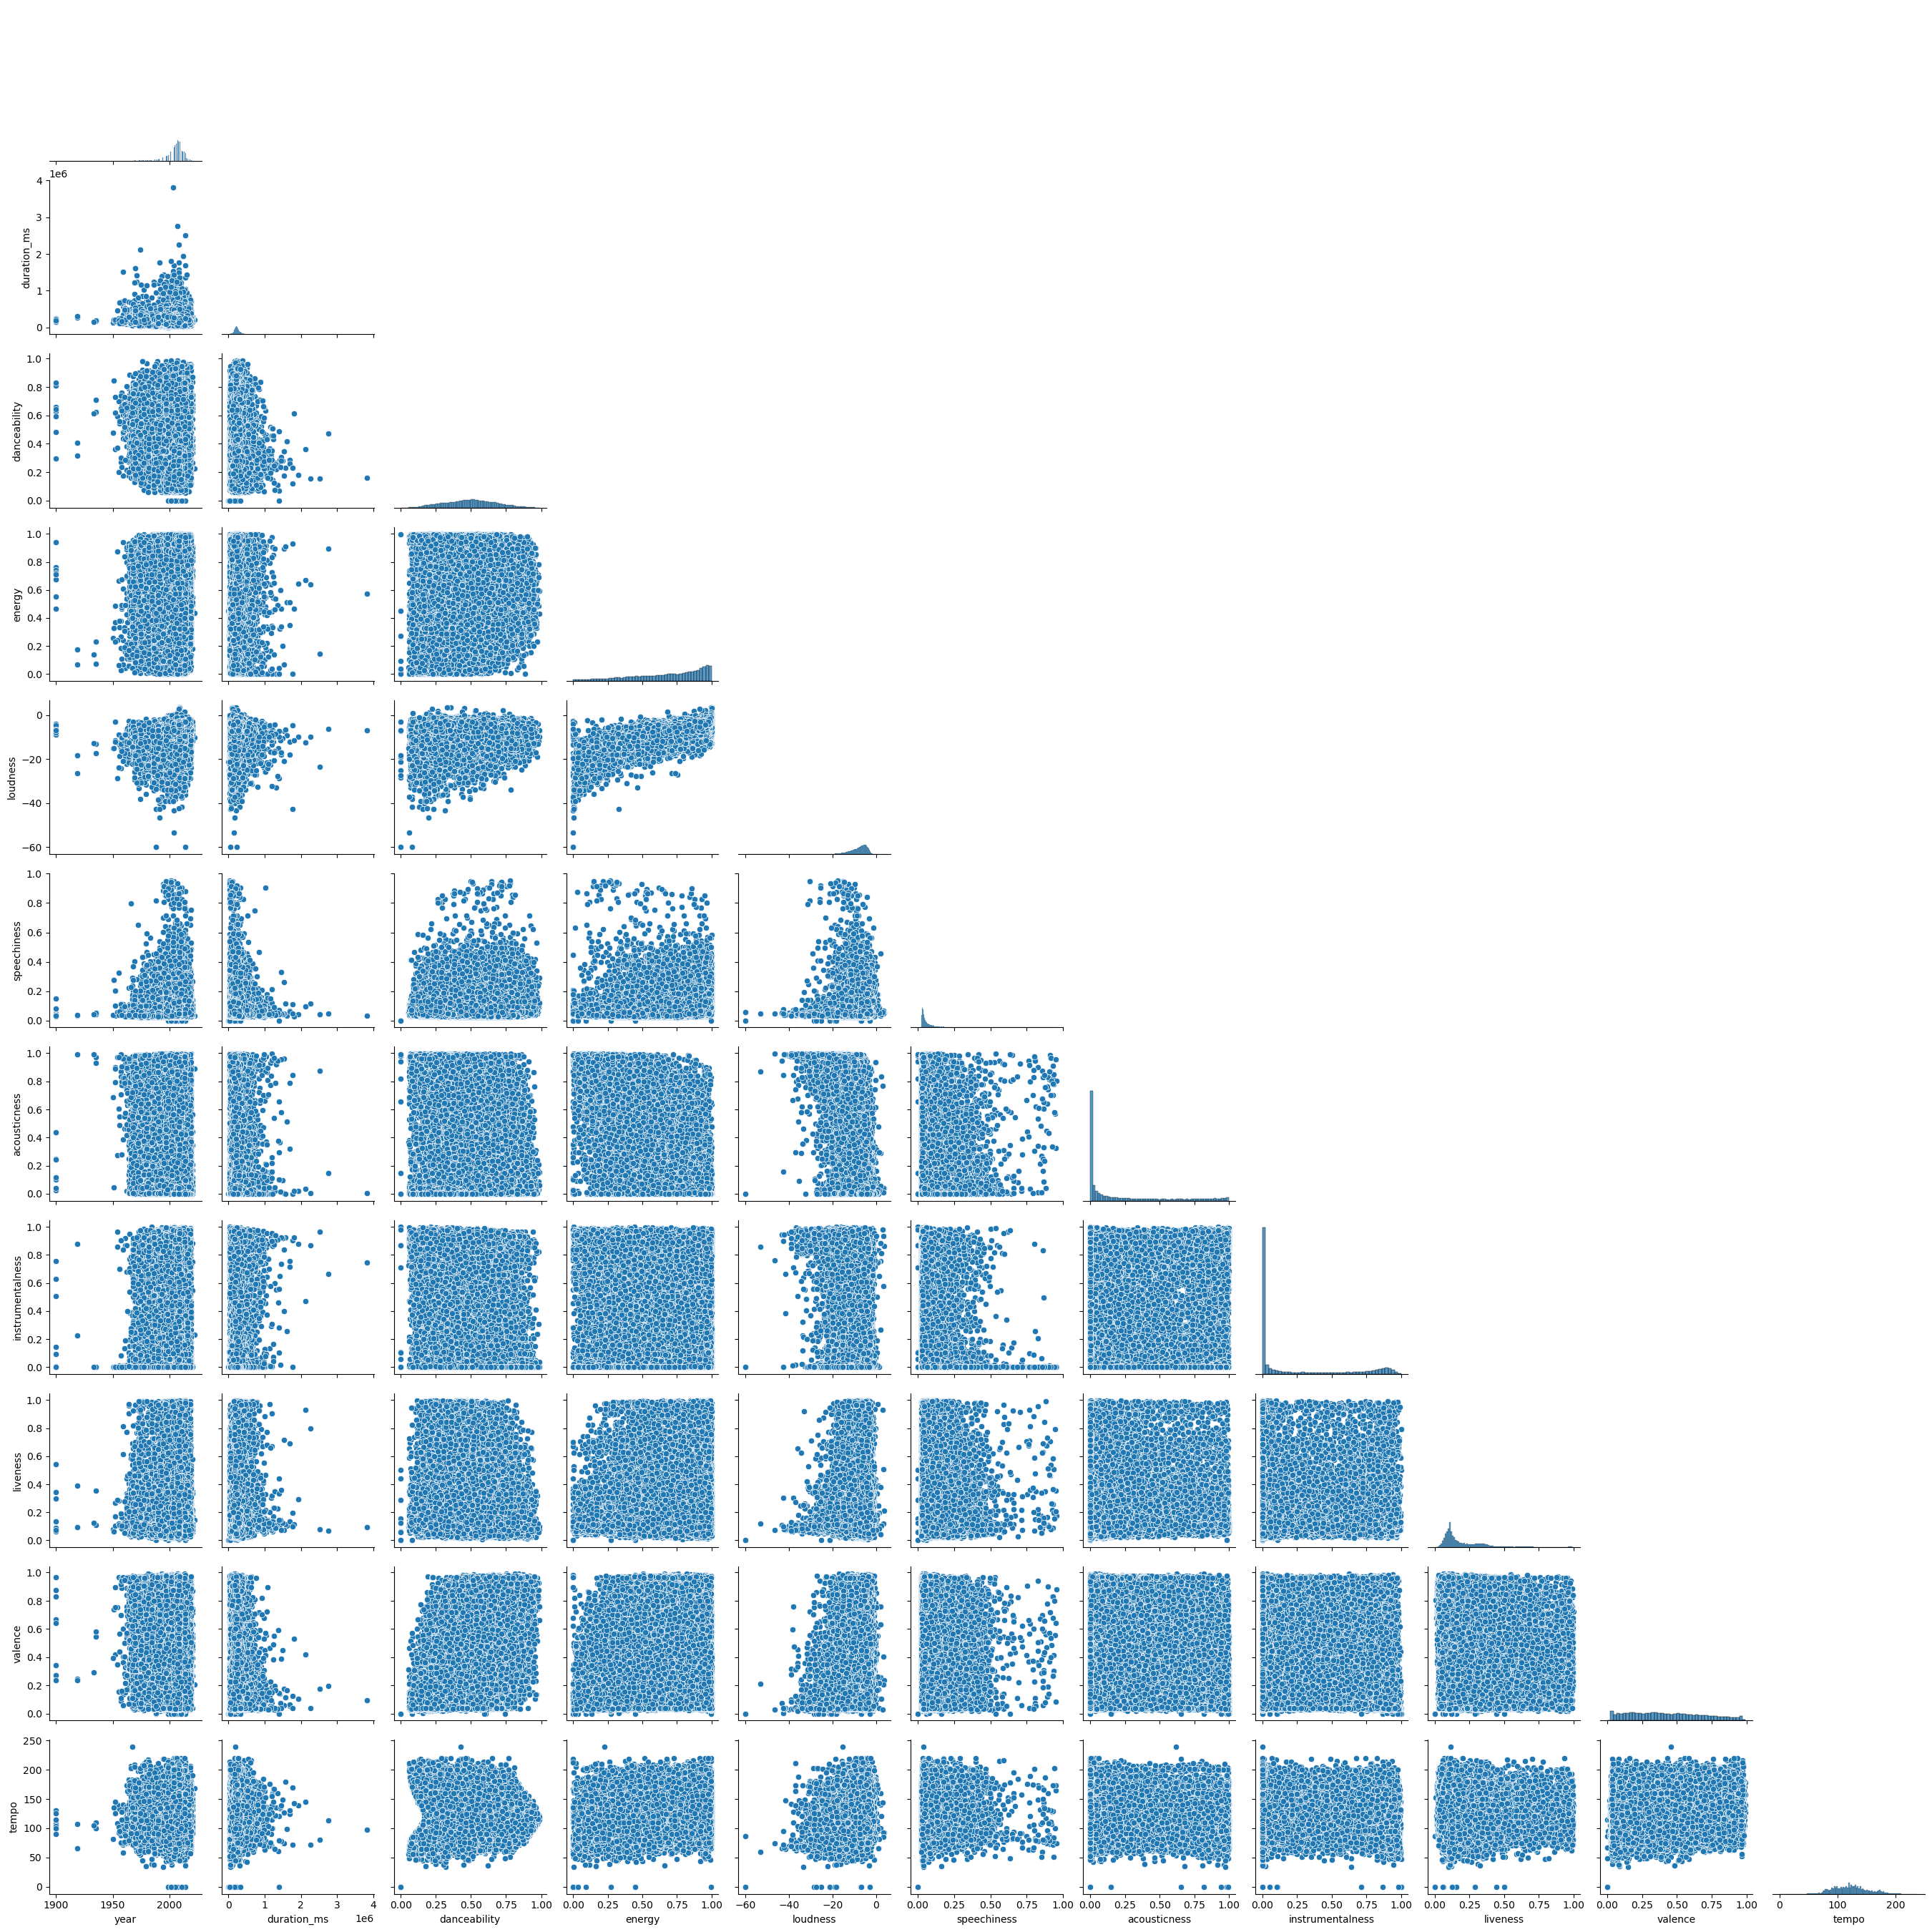

In [26]:
df_corr = df_track_cleaned.drop(['key', 'mode', 'time_signature'], axis=1)

sns.pairplot(df_corr, corner=True)
plt.show()

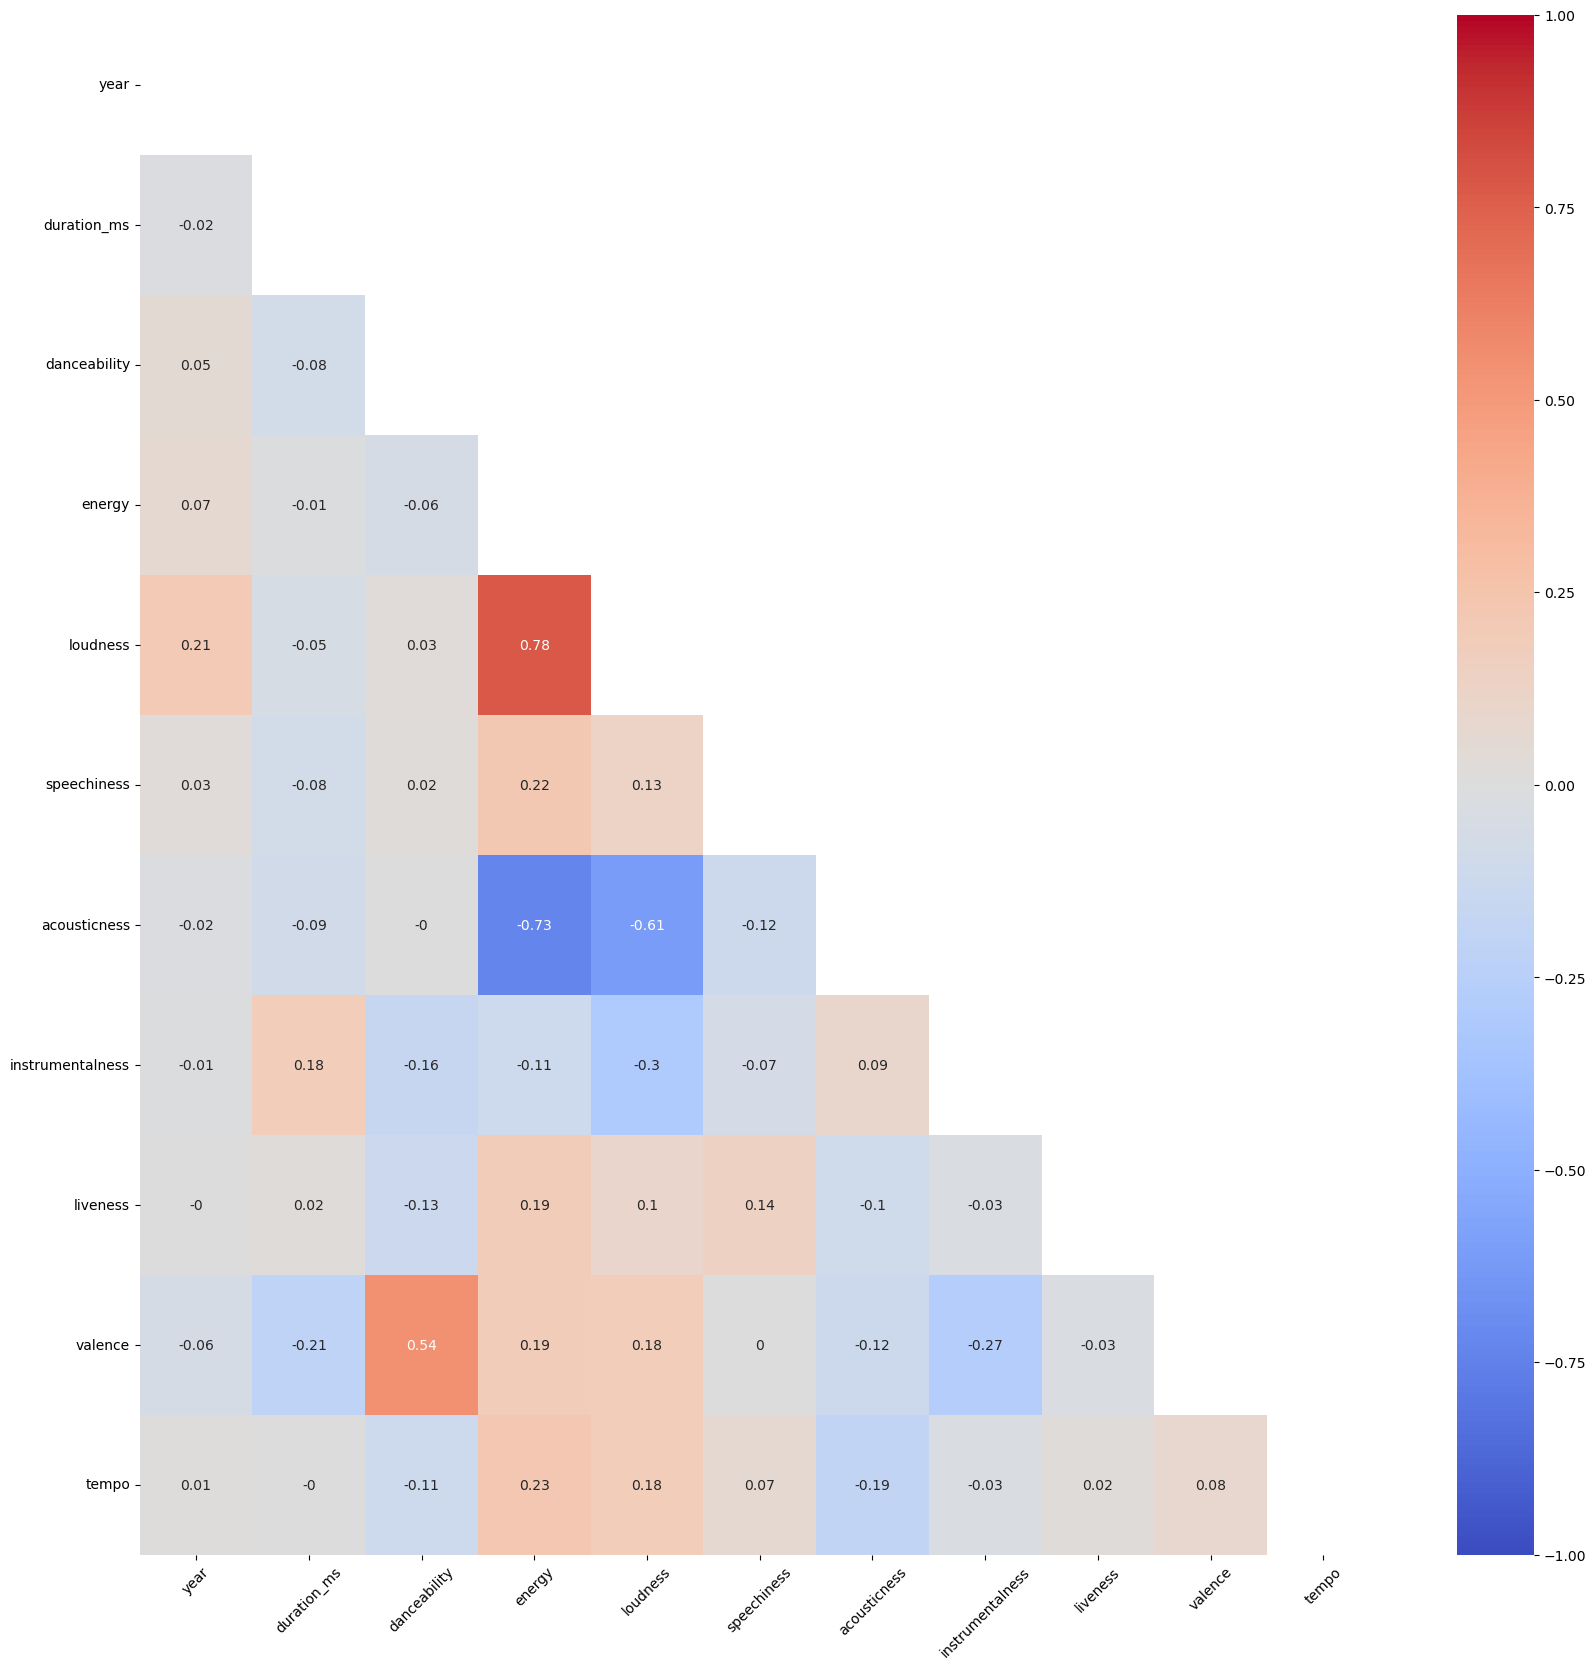

In [27]:
plt.figure(figsize=(20,20))
mask = np.triu(df_corr.corr(numeric_only=True))
sns.heatmap(df_corr.corr(numeric_only=True).round(2),
            annot=True,
            center=0,
            vmax=1,
            vmin=-1,
            mask=mask,
            cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Within the set of numerical variables, there are 3 pairs of variables that show a relatively strong correlation:
- `energy` and `loudness` - correlation = 0.78; in the pairplot in its own pair, a linear shape is also obvious
- `acousticness` and `energy` - correlation = -0.73
- `acousticness` and `loudness` - correlation = -0.61

`valence` and `danceability` show some mild correlation where correlation = 0.54

For other pairs, we do not see any strong correlation here.

---

# Exploratory Data Analysis - Categorical Variables <a name="EDA_Cat"></a>

## Univariate Analysis <a name="Uni_Cat"></a>

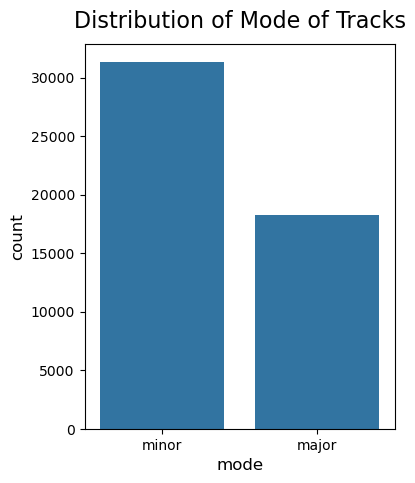

In [28]:
mode_series = df_track_cleaned['mode'].value_counts()

plt.figure(figsize=(4,5))
sns.barplot(x=mode_series.index, y=mode_series.values, order=mode_series.index, color='tab:blue')
plt.xticks([0, 1], ['minor', 'major'])
plt.xlabel('mode', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title('Distribution of Mode of Tracks', fontsize=16, y=1.02)
plt.show()

In [29]:
key_center_series = df_track_cleaned['key'].value_counts()
key_center_series.rename({
    0 : 'C',
    1 : 'C♯/D♭',
    2 : 'D',
    3 : 'D♯/E♭',
    4 : 'E',
    5 : 'F',
    6 : 'F♯/G♭',
    7 : 'G',
    8 : 'G♯/A♭',
    9 : 'A',
    10 : 'A♯/B♭',
    11 : 'B'
}, inplace=True)

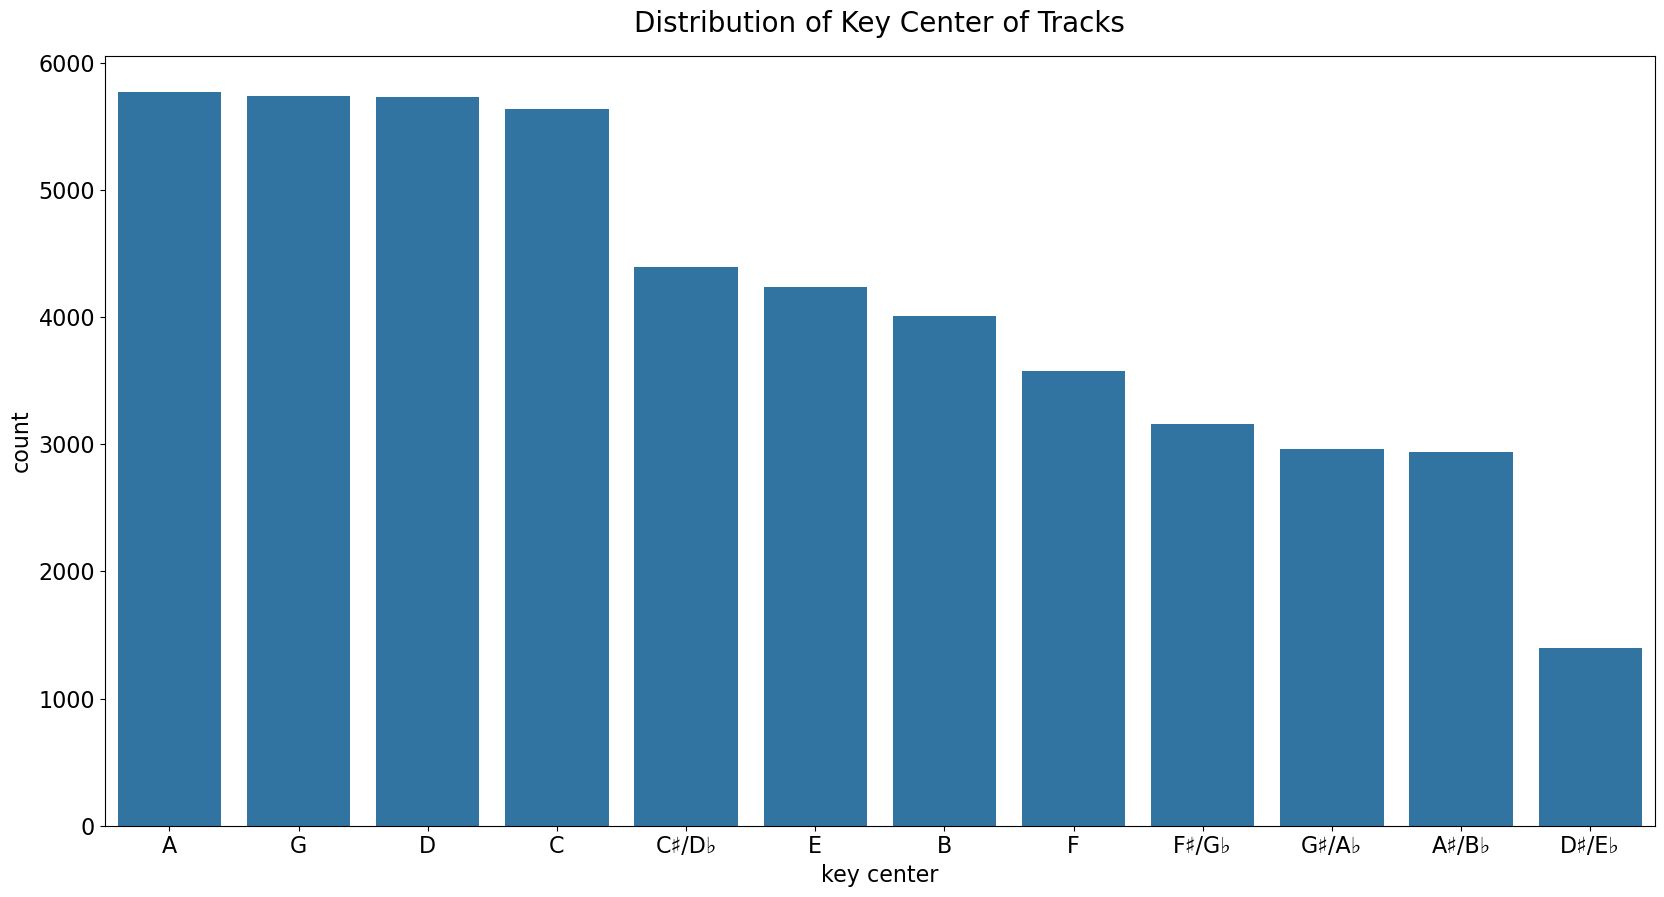

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x=key_center_series.index, y=key_center_series.values, order=key_center_series.index, color='tab:blue')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('key center', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.title('Distribution of Key Center of Tracks', fontsize=20, y=1.02)
plt.show()

In [31]:
df_key = pd.DataFrame({'key': (df_track_cleaned['mode'].astype('str') + '|' + df_track_cleaned['key'].astype('str'))},\
                      index=df_track_cleaned.index)['key'].value_counts(ascending=True)

df_key.rename({
    '1|0' : 'C Major',
    '1|1' : 'D♭ Major',
    '1|2' : 'D Major',
    '1|3' : 'E♭ Major',
    '1|4' : 'E Major',
    '1|5' : 'F Major',
    '1|6' : 'F♯/G♭ Major',
    '1|7' : 'G Major',
    '1|8' : 'A♭ Major',
    '1|9' : 'A Major',
    '1|10' : 'B♭ Major',
    '1|11' : 'B Major',
    '0|0' : 'C minor',
    '0|1' : 'C♯ minor',
    '0|2' : 'D minor',
    '0|3' : 'D♯/E♭ minor',
    '0|4' : 'E minor',
    '0|5' : 'F minor',
    '0|6' : 'F♯ minor',
    '0|7' : 'G minor',
    '0|8' : 'G♯ minor',
    '0|9' : 'A minor',
    '0|10' : 'B♭ minor',
    '0|11' : 'B minor',
}, inplace=True)

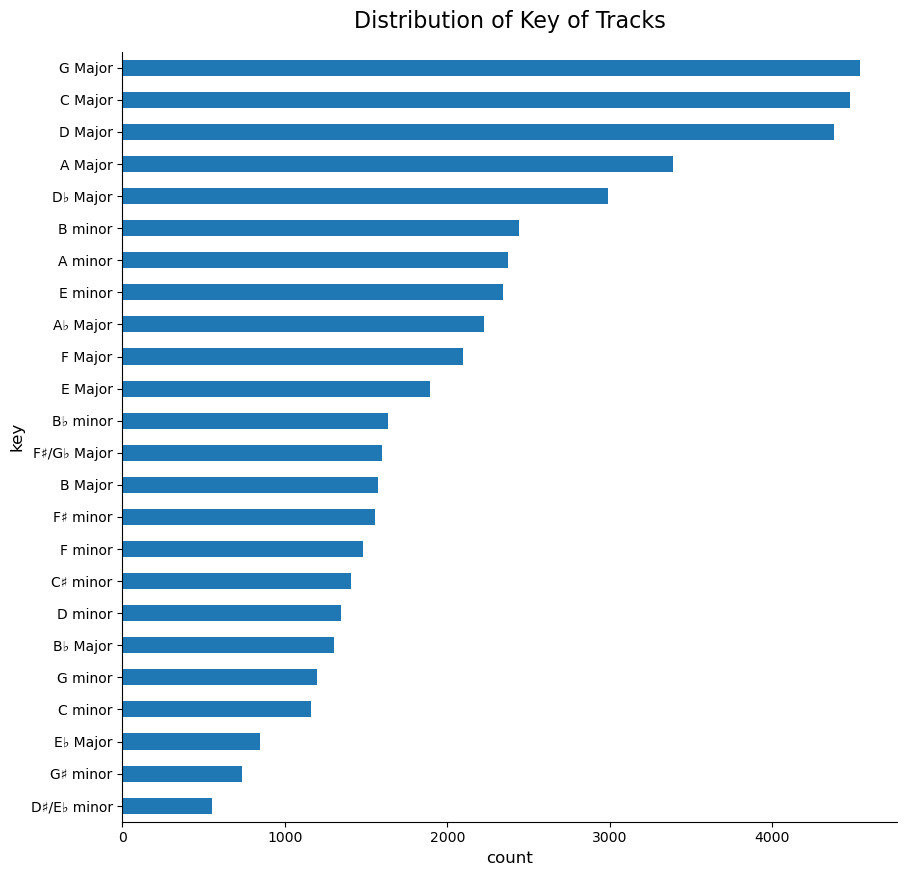

In [32]:
plt.figure(figsize=(10,10))
ax = df_key.plot.barh(y='key', x=df_key.values)
plt.xlabel('count', fontsize=12)
plt.ylabel('key', fontsize=12)
plt.title('Distribution of Key of Tracks', fontsize=16, y=1.02)
ax.spines[['top', 'right']].set_visible(False)
plt.show()

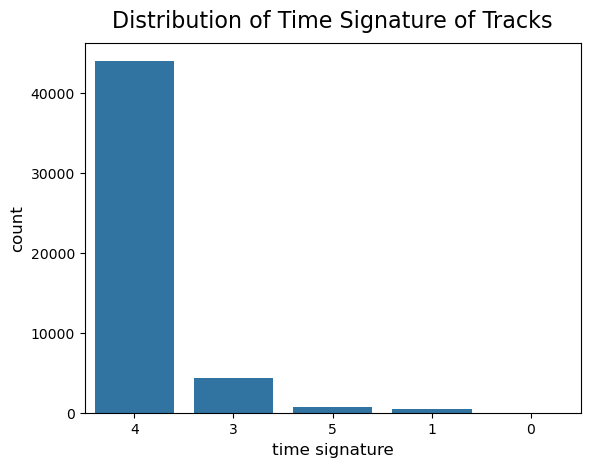

In [33]:
ts_series = df_track_cleaned['time_signature'].value_counts()

plt.figure()
sns.barplot(x=ts_series.index, y=ts_series.values, order=ts_series.index, color='tab:blue')
plt.xlabel('time signature', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title('Distribution of Time Signature of Tracks', fontsize=16, y=1.02)
plt.show()

For the tracks in the dataset:

Mode used in tracks:

- Major keys are employed far more times than minor keys.

Key center used in tracks:

- The top 4 most used key centers are A, G, D and C. The D♯/E♭ key is the least used key center. There is no music without key centers detected in the dataset. (The value of `key` would be displayed as $-1$ if no key center is deteced.)

Key used in tracks:

- G Major, C Major and D Major are the top 3 most commonly used keys in the dataset.

Time signature in tracks:

- 4-beat is still the most commonly used time signature in the dataset.

Overall, the tracks in the dataset demonstrated a decent amount of variety in the audio features shown above.

---

# User data

In [42]:
sanity_check(df_user)

======================================= Head of the dataset ========================================



,0,1,2,3,4
track_id,TRIRLYL128F42539D1,TRFUPBA128F934F7E1,TRLQPQJ128F42AA94F,TRTUCUY128F92E1D24,TRHDDQG12903CB53EE
user_id,b80344d063b5ccb3212f76538f3d9e43d87dca9e,b80344d063b5ccb3212f76538f3d9e43d87dca9e,b80344d063b5ccb3212f76538f3d9e43d87dca9e,b80344d063b5ccb3212f76538f3d9e43d87dca9e,b80344d063b5ccb3212f76538f3d9e43d87dca9e
playcount,1,1,1,1,1



 

==================================== Basic info of the dataset =====================================

Our dataset has 9711301 rows and 3 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711301 entries, 0 to 9711300
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   track_id   object
 1   user_id    object
 2   playcount  int64 
dtypes: int64(1), object(2)
memory usage: 222.3+ MB

 
**Basic descriptive statistics of the dataset**


,count,mean,std,min,25%,50%,75%,max
playcount,9711301.0,2.630946,5.706324,1.0,1.0,1.0,2.0,2948.0



 

============================================ Data Types ============================================



,Numerical
0,playcount


,Non-numerical
0,track_id
1,user_id


,Categorical
0,track_id
1,user_id


,Date-time



 

========================================== Missing Values ==========================================

There are 0 missing values in total, which comprise 0.0% of the dataset.

Missing Values per column:


,Missing Values,% of the column,Data Types
track_id,0,0.0,object
user_id,0,0.0,object
playcount,0,0.0,int64



 

============================================ Duplicates ============================================

There are 0 Duplicated Rows, which comprise 0.0% of the dataset. 

Duplicated Values per column:


,Number of Duplicated Values,% of the column,Data Types
track_id,9680842,99.69,object
user_id,8749264,90.09,object
playcount,9710871,100.00,int64



 

========================================== Unique Values ===========================================

Number of Unique Values per column:


,Number of Unique Values,Data Types
track_id,30459,object
user_id,962037,object
playcount,430,int64


In [43]:
# checking the pairs of track_id and user_id
df_user[['track_id', 'user_id']].duplicated().sum()

0

In [44]:
# checking the track_id
print(f"Number of unique track_id: {df_user['track_id'].nunique()}")
print(f"Number of duplicated track_id: {df_user.shape[0]-df_user['track_id'].nunique()}")

Number of unique track_id: 30459
Number of duplicated track_id: 9680842


In [45]:
# checking the user_id
print(f"Number of unique user_id: {df_user['user_id'].nunique()}")
print(f"Number of duplciated user_id: {df_user.shape[0]-df_user['user_id'].nunique()}")

Number of unique user_id: 962037
Number of duplciated user_id: 8749264


## Observations on the "User_Listening_History" dataset: <a name="ObsUser"></a>

- The "User_Listening_History" dataset has 9,711,301 rows and 3 columns.

**Data types**
- strings columns - `track_id`, `user_id`
- numerical columns - `playcount`

**Null values**

There are no missing values in the dataset.

**Duplicates**
- no exact duplicates for rows
- the pairs of `track_id` and `user_id` for the rows are all unique in the dataset
- only 30,459 unique values of `track_id` in the column and 9,680,842 duplicated `track_id`
- 962,037 unique values of `user_id` in the column and 8,749,264 duplicated `user_id`

This means that only **30,459 tracks** are included in the dataset and the play counts on these tracks of **962,037 different users** are captured here.

---

# df_user_track

This is the dataframe created by joining the two datasets "Music_Info" and "User_Listening_History". It will be used for further investigation into the user engagement and track exposure on the music streaming platforms in Notebook 02.

In [216]:
# merging df_user and df_track_cleaned by inner joining on track_id
df_user_track = df_user.merge(df_track_cleaned, how='inner', on='track_id')

In [218]:
df_user_track.head(2).T

,0,1
track_id,TRIRLYL128F42539D1,TRIRLYL128F42539D1
user_id,b80344d063b5ccb3212f76538f3d9e43d87dca9e,fd13b9d49c54e00ff413fe3c095ba581c7fc611e
playcount,1,8
name,Nothing From Nothing,Nothing From Nothing
artist,Billy Preston,Billy Preston
spotify_preview_url,https://p.scdn.co/mp3-preview/340c79f3f19b448e...,https://p.scdn.co/mp3-preview/340c79f3f19b448e...
spotify_id,0d42LKqrWFVu05jAv9mwwE,0d42LKqrWFVu05jAv9mwwE
tags,"soul, funk, piano, 70s, oldies","soul, funk, piano, 70s, oldies"
year,2010,2010
duration_ms,155453,155453


**Sanity Check**

In [219]:
df_user_track.duplicated().sum()

0

In [220]:
display(pd.DataFrame({'Missing Value': df_user_track.isna().sum(),
                      '% of the column': (df_user_track.isna().mean()*100).round(2)}))

,Missing Value,% of the column
track_id,0,0.0
user_id,0,0.0
playcount,0,0.0
name,0,0.0
artist,0,0.0
spotify_preview_url,0,0.0
spotify_id,0,0.0
tags,0,0.0
year,0,0.0
duration_ms,0,0.0


df_user_track has no duplicated row and no missing value.

In [221]:
df_user_track.shape

(9637169, 22)

In [222]:
print(f"Number of unique user_id: {df_user_track['user_id'].nunique()}")

Number of unique user_id: 960750


In [223]:
print(f"Number of unique track_id: {df_user_track['track_id'].nunique()}")

Number of unique track_id: 29756


## Observations on the User-track dataset: <a name="ObsUserTrack"></a>

Notice again that there are 49,548 unique `track_id` in df_track_cleaned and 30,459 unique `track_id` in df_user.

After inner-joining the two datasets on `track_id`, there are **29,756 unique `track_id` left**. It means that there are 703 unique `track_id` in df_user that do not exist in df_track_cleaned and they are excluded from df_user_track.

The number of unique `user_id` drops to **960,750** after the inner-join.

In [224]:
# df_user_track.to_csv(file_path + 'data/df_user_track.csv', index=False)

In [46]:
# check_file_user_track = os.path.isfile(file_path + 'data/df_user_track.csv')

# print(check_file_user_track)

True


In [48]:
# # uncomment this cell and run df_user_track from here
# df_user_track = pd.read_csv(file_path + 'data/df_user_track.csv')
# df_user_track.head().T

,0,1,2,3,4
track_id,TRIRLYL128F42539D1,TRIRLYL128F42539D1,TRIRLYL128F42539D1,TRIRLYL128F42539D1,TRIRLYL128F42539D1
user_id,b80344d063b5ccb3212f76538f3d9e43d87dca9e,fd13b9d49c54e00ff413fe3c095ba581c7fc611e,35752a9e4d917c8fc5da88e90c25adc6b52220b6,bfe8d6d1e32d9de12c632d68712e7e4a23416e93,46d3ef1b4f317aba8f0226e937c67ecef9fa2e42
playcount,1,8,1,1,4
name,Nothing From Nothing,Nothing From Nothing,Nothing From Nothing,Nothing From Nothing,Nothing From Nothing
artist,Billy Preston,Billy Preston,Billy Preston,Billy Preston,Billy Preston
spotify_preview_url,https://p.scdn.co/mp3-preview/340c79f3f19b448e...,https://p.scdn.co/mp3-preview/340c79f3f19b448e...,https://p.scdn.co/mp3-preview/340c79f3f19b448e...,https://p.scdn.co/mp3-preview/340c79f3f19b448e...,https://p.scdn.co/mp3-preview/340c79f3f19b448e...
spotify_id,0d42LKqrWFVu05jAv9mwwE,0d42LKqrWFVu05jAv9mwwE,0d42LKqrWFVu05jAv9mwwE,0d42LKqrWFVu05jAv9mwwE,0d42LKqrWFVu05jAv9mwwE
tags,"soul, funk, piano, 70s, oldies","soul, funk, piano, 70s, oldies","soul, funk, piano, 70s, oldies","soul, funk, piano, 70s, oldies","soul, funk, piano, 70s, oldies"
year,2010,2010,2010,2010,2010
duration_ms,155453,155453,155453,155453,155453


---

# Notebook Summary

The size of the datasets comprise amount big enough for machine learning and further analysis, in terms of both the number of tracks and the number of users. The diversity of audio features of the tracks in the cleaned dataset is also good enough for finding variety for users.

For now, we only have `playcount` as the user engagement data, which is limited for finding further insights. We will investigate the user engagement and the track exposure on the music streaming platforms using `playcount` in Notebook 02.